**ML COURSE 2024-2025**
# LAB1: Dimensionality reduction
**Part 2**
In this notebook you will implement PCA from scratch using numpy and an application of t-SNE.

#### Summary
- **Part 0**: Data Structures, introduction to NumPy, pandas, matplotlib and seaborn. 
- **Part 1**: Datasets analysis, statistics and visualizations. 
- **Part 2**: PCA from scratch

## PCA

**What is it**    
Linear transformation of variables.

**Utilization**  
- Purpose: **reduce dimensionality** (number of variables) while retaining as much information as possible. 
- Input: a dataset with $N$ samples and $d$ variables.  
- Output: the transformed dataset with $N$ samples and $p$ _new_ variables where $p < d$. 

**How it works**    
Computes the sequence of mutually **orthogonal** vectors that best fit the data, aka the principal components. 

**PCA (Intuition in 2D)**  
After data standardization/centering, compute the first component (PC1): 
- find the best-fit line that <span style="color:green">minimizes the squared sum of the distances of the points from the line</span> (black dashed lines in the plot)
- equivalent to find the <span style="color:dodgerblue">maximizes the the sum of squared distances from the origin of the _projections_</span> of the points onto the line: $$\text{SS(distances)}=d_1^2+...+d_n^2=\sum_i d_i^2 $$ 
- this means we are looking for the line where projections are as spread out as possible 
- but maximize the spread = <span style="color:orange">maximize the variance</span> along the line direction!

The second principal component is orthogonal to the first one. 

Note 1: instead of a line we look for a 1-unit-long vector in the same direction of the line, which is called, in the PCA case, **eigenvector**.  
Note 2: the average of the SS(distances) is called **eigenvalue**, which represents the variability along the direction given by the correspective eigenvector. 


In [1]:
#from utils import get_interactive_plot_pca
#get_interactive_plot_pca()

**PCA with the covariance method**  
One way to implement PCA in practice:
1. **Data standardization**: (Z-score normalization): to each point remove mean and divide by standard deviation $$X_{scaled} = \frac{X-\mu}{\sigma}$$ where $\mu$ is the mean and $\sigma$ is the standard deviation of each feature.
2. **Covariance matrix**: compute the covariance matrix which accounts for the variability of the dataset.
3. **Eigen decomposition**: compute the eigenvectors (orthogonal directions) and the associated eigenvalues (quantifies the variance along the corresponding eigenvector).
4. **Ordering**: rank the eigenvectors by their corresponding eigenvalues in descending order (variance maximization).
5. **Projection**: transform the dataset py projecting it onto the eigenvectors to obtain the principal components.

In [2]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load california housing dataset 
cali_housing_df = pd.read_csv('drive/MyDrive/AA24-25ML/california_housing.csv')
X = cali_housing_df.drop('MedInc', axis=1).to_numpy()

In [3]:
# 1. Standardize the data X
X_mean = np.mean(X, axis=0)             # Note: since X is a matrix, axis=0 is necessary to compute the mean of each column/variable. 
                                        # Otherwise, np.mean(X) would compute the mean of all the elements in X.
X_std = np.std(X, axis=0)               # Similarly, compute the standard deviation of each column/variable.
X_standardized = (X - X_mean) / X_std

In [4]:
# 2. Find the covariance matrix
# 🕵 Hint: use np.cov() or use the definition. Please note that np.cov assumes by default that each row is a variable 
# and each column an observation. Here we have the opposite, so we need to set rowvar=False.

covariance_matrix = np.cov(X_standardized, rowvar=False)       

In [5]:
help(np.linalg.eig)


Help on _ArrayFunctionDispatcher in module numpy.linalg:

eig(a)
    Compute the eigenvalues and right eigenvectors of a square array.
    
    Parameters
    ----------
    a : (..., M, M) array
        Matrices for which the eigenvalues and right eigenvectors will
        be computed
    
    Returns
    -------
    A namedtuple with the following attributes:
    
    eigenvalues : (..., M) array
        The eigenvalues, each repeated according to its multiplicity.
        The eigenvalues are not necessarily ordered. The resulting
        array will be of complex type, unless the imaginary part is
        zero in which case it will be cast to a real type. When `a`
        is real the resulting eigenvalues will be real (0 imaginary
        part) or occur in conjugate pairs
    
    eigenvectors : (..., M, M) array
        The normalized (unit "length") eigenvectors, such that the
        column ``eigenvectors[:,i]`` is the eigenvector corresponding to the
        eigenvalue ``eigenval

In [6]:
# 3. Find eigenvalues and eigenvectors of the covariance matrix
# 🕵 Hint: use np.linalg.eig(). Look at the documentation online or use help() function

eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print("Egigenvalues are: ", eigenvalues)

Egigenvalues are:  [2.02239508 1.8333078  1.25746788 1.00310444 0.6698322  0.06645596
 0.1477758 ]


In [7]:
# 4. Sort eigevectors according to the absolute value of eigenvalues in descending order. 
# 🕵 Hint: use np.argsort(), then order eigenvectors

sorted_indices = np.argsort(eigenvalues)                         # Sort indices in ascending order
sorted_indices = sorted_indices[::-1]                            # Reverse the order to get descending order

sorted_eigenvalues = eigenvalues[sorted_indices]                 # Sort eigenvalues
sorted_eigenvectors = eigenvectors[:, sorted_indices]            # Sort eigenvectors

Number of principal components that explain 95% of the variance: 5


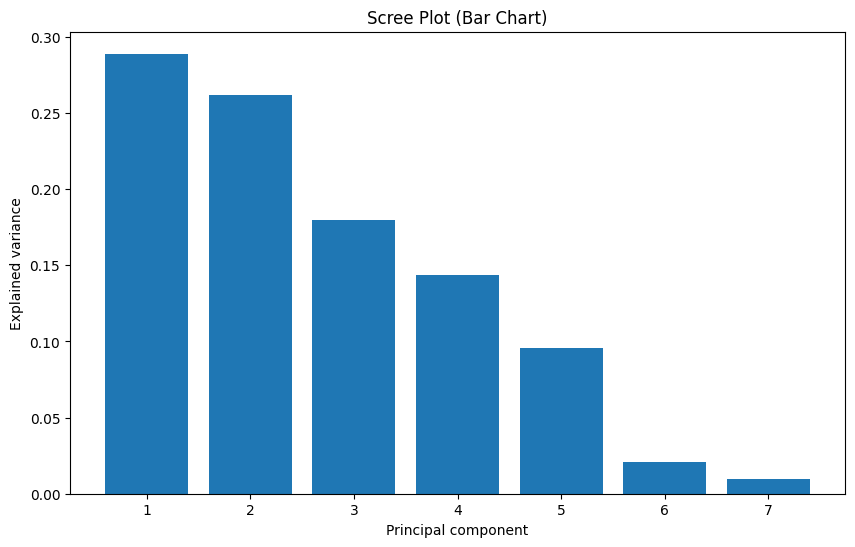

In [8]:
# 5. Check which is the number k of principal components that accounts for 95% of the variance
# 🕵 Hint. Once you have sorted eigenvalues you can use the following code: 

explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)                          # calculate explained variance
cumulative_variance = np.cumsum(explained_variance)                             # calculate cumulative variance
k = np.argmax(cumulative_variance >= 0.95) + 1                                  # find the minimum number of principal components that explain 95% of the variance
print('Number of principal components that explain 95% of the variance:', k)

# we can also plot the scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(eigenvalues) + 1), explained_variance)
plt.xlabel('Principal component')
plt.ylabel('Explained variance')
plt.title('Scree Plot (Bar Chart)')
plt.show()

In [9]:
# 6. For this time, let's select k=2 principal components regardless of the variance explained
k = 2 
principal_components = sorted_eigenvectors[:, 0:k]          # Select the first k eigenvectors. The sorted_eigenvectors is 
                                                            # a matrix where each column is an eigenvector. So we need to 
                                                            # select all rows and the first k columns (0:k means from column 0 
                                                            # to column k-1, i.e. columns 0 and 1 in this case).

In [10]:
# 7. Project the data X into the new space spanned by the first 2 PC given by pc_components[:, :k] where k=2
# 🕵 Hint: use np.dot() function
X_projected = np.dot(X_standardized, principal_components)    # Project the data into the new space spanned by the first 2 PC

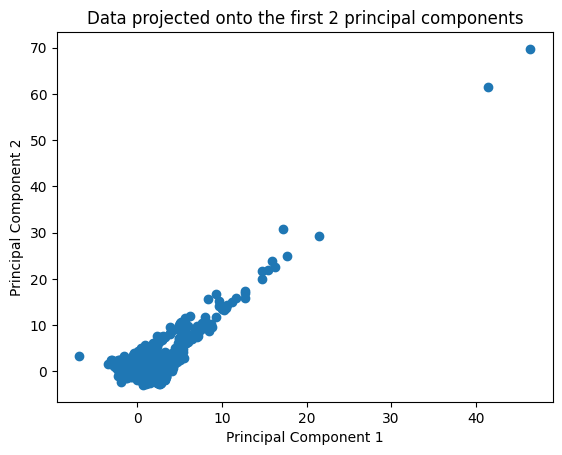

In [11]:
# 8. Plot the data in the new space
plt.figure()
plt.scatter(X_projected[:, 0], X_projected[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data projected onto the first 2 principal components')
plt.show()

<span style="color:red"><strong>🏋️‍♀️ Exercise</strong></span>

Compute the PCA using the same steps as above WITHOUT data normalization. Compare the results, by plotting the data in the new space with and without normalization.

1
2
3
4
5
6


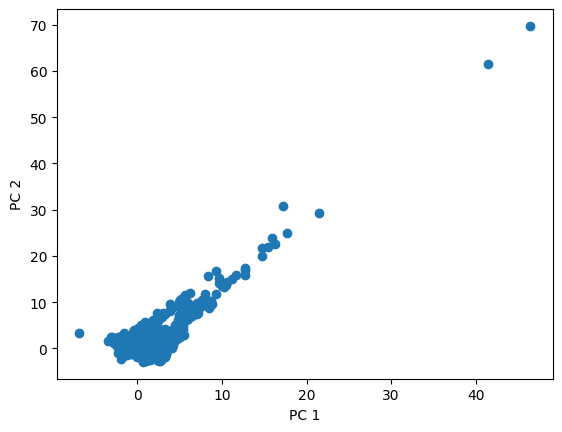

7


In [12]:
# your code here... 

# 1. skip the standardization step
X_scaled = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
print(1)

# 2. covariance matrix
cov_matrix = np.cov(X_scaled, rowvar = False)
print(2)

# 3. eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(3)


# 4. sort eigenvectors according to the absolute value of eigenvalues in descending order
sort_indexs = np.argsort(eigenvalues)
sort_indexs = sort_indexs[::-1]

sort_eigeval = eigenvalues[sort_indexs] 
sort_eigevect = eigenvectors [:, sort_indexs]
print(4)

# 5. Select the first 2 principal components
k = 2
expl_var = sort_eigeval / np.sum(sort_eigeval)
cumulative_var = np.cumsum(expl_var)

k = np.argmax(cumulative_var >= 0.95) + 1
pc = sort_eigevect[:, 0:k]
print(5)


# 6. Project the data X into the new space spanned by the first 2 PC given by pc_components[:, :k] where k=2
X_proj = np.dot(X_scaled, pc)
print(6)


# 7. Plot the data in the new space
plt.figure()
plt.scatter(X_proj[:, 0], X_proj[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()
print(7)



# Note: this is mirrored with respect to what you have seen in class. 
# This is because the eigenvectors are only defined up to a sign. In this case, we can flip the sign of the second PC
# to match the plots. In any case, both solutions are correct. 


## t-SNE

t-distributed Stochastic Neighbor Embedding (t-SNE): 

- Non-linear dimensionality reduction technique (unlike PCA which is linear)
- Well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions
- Similar objects are modeled by nearby points 
- Dissimilar objects are modeled by distant points

Text(0.5, 1.0, 'Digits dataset without dimensionality reduction')

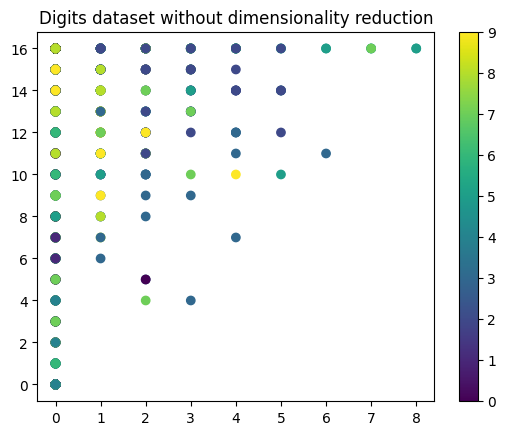

In [13]:
# import the dataset: digits is a dataset of 8x8 images of numerical digits
from sklearn.datasets import load_digits

# load the dataset
data = load_digits()
X = data["data"]
y = data["target"]

# Trying to plot the data directly will not work because it has 64 dimensions
import matplotlib.pyplot as plt

# Let's try and plot feature 1 and 10, the color represents the target digit
plt.scatter(X[:, 1], X[:, 10], c=y, cmap='viridis')
plt.colorbar()
plt.title("Digits dataset without dimensionality reduction")

Text(0.5, 1.0, 'Digits dataset with t-SNE')

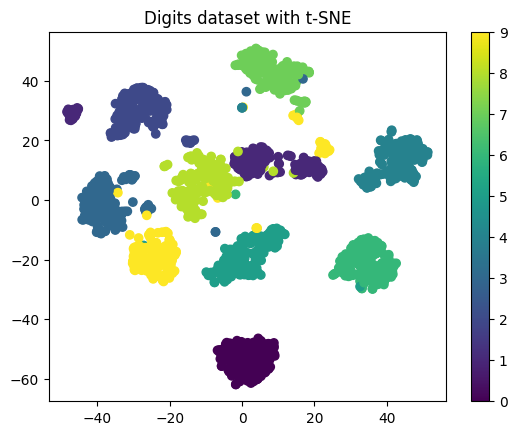

In [14]:
# Example of tsne plot of the digits dataset
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)

X_tsne = tsne.fit_transform(X)

# Now we can see clusters of digits much better
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.colorbar()
plt.title("Digits dataset with t-SNE")